In [89]:
import pandas as pd
import numpy as np
import string
from string import digits
import re
import pickle as pkl
from keras.preprocessing.text import one_hot
from sklearn.utils import shuffle

In [42]:
with open ('/content/drive/MyDrive/Colab Notebooks/mar.txt','r') as f:
  data=f.read()

In [43]:
len(data)

6354450

In [44]:
uncleaned_data=data.split('\n')
len(uncleaned_data)

46966

In [45]:
uncleaned_data=uncleaned_data[:38695]
len(uncleaned_data)

38695

In [46]:
english_word=[]
marathi_word=[]
for word in uncleaned_data:
  english_word.append(word.split('\t')[:-1][0])
  marathi_word.append(word.split('\t')[:-1][1])

In [47]:
print(english_word)

['Go.', 'Run!', 'Run!', 'Run!', 'Run!', 'Who?', 'Wow!', 'Duck!', 'Fire!', 'Fire!', 'Help!', 'Help!', 'Jump!', 'Jump!', 'Jump.', 'Jump.', 'Stop!', 'Stop!', 'Wait!', 'Wait!', 'Wait.', 'Wait.', 'Hello!', 'Hurry!', 'Hurry!', 'Hurry!', 'I won!', 'I won!', 'Get up.', 'Got it!', 'Got it?', 'Got it?', 'Got it?', 'Got it?', 'He ran.', 'He ran.', 'He ran.', 'He ran.', 'I fell.', 'I fell.', 'I fell.', 'I fell.', 'I know.', 'I know.', 'I know.', 'I lost.', 'I lost.', 'I spit.', 'I spit.', 'I work.', 'I work.', "I'm OK.", 'Listen.', 'Listen.', 'No way!', 'Really?', 'Really?', 'Really?', 'Thanks.', 'We won.', 'We won.', 'Why me?', 'Why me?', 'Ask Tom.', 'Ask Tom.', 'Call me.', 'Call me.', 'Call me.', 'Call me.', 'Call us.', 'Call us.', 'Come in.', 'Come on!', 'Come on!', 'Fold it.', 'Fold it.', 'Get Tom.', 'Get Tom.', 'Get Tom.', 'Get out.', 'Get out.', 'Go home.', 'He came.', 'He came.', 'He left.', 'He left.', 'He runs.', 'He runs.', 'He runs.', 'He runs.', 'Help me!', 'Help me!', 'Help me!', 'Hel

In [48]:
print(marathi_word)

['जा.', 'पळ!', 'धाव!', 'पळा!', 'धावा!', 'कोण?', 'वाह!', 'खाली वाका!', 'आग!', 'फायर!', 'वाचवा!', 'वाचव!', 'उडी मार!', 'उडी मारा!', 'उडी मार.', 'उडी मारा.', 'थांबा!', 'थांब!', 'थांबा!', 'थांब!', 'थांब.', 'थांबा.', 'हॅलो!', 'लवकर!', 'लवकर कर!', 'लवकर करा!', 'मी जिंकलो!', 'मी जिंकले!', 'ऊठ.', 'पकडलं!', 'कळलं?', 'समजलं?', 'कळलं का?', 'समजलं का?', 'तो पळाला.', 'ते पळाले.', 'तो धावला.', 'ते धावले.', 'मी पडलो.', 'मी पडले.', 'पडलो.', 'पडले.', 'मला माहीत आहे.', 'माहितीये.', 'माहीत आहे.', 'मी हरलो.', 'मी हरले.', 'मी थुकतो.', 'मी थुकते.', 'मी काम करतो.', 'मी काम करते.', 'मी ठीक आहे.', 'ऐक.', 'ऐका.', 'शक्यच नाही!', 'खरोखर?', 'खरंच?', 'खरंच का?', 'धन्यवाद.', 'आम्ही जिंकलो.', 'आपण जिंकलो.', 'मीच का?', 'मी का?', 'टॉमला विचार.', 'टॉमला विचारा.', 'मला बोलव.', 'मला बोलवा.', 'मला फोन करा.', 'मला फोन कर.', 'आम्हाला फोन कर.', 'आम्हाला फोन करा.', 'आत ये.', 'चल!', 'चला!', 'घडी घाल.', 'घडी घाला.', 'टॉमला घे.', 'टॉमला आण.', 'टॉमला पकड.', 'बाहेर हो.', 'बाहेर व्हा.', 'घरी जा.', 'तो आला.', 'ते आले.', 'तो निघाला.',

In [49]:
languages=pd.DataFrame(columns=['English','Marathi'])

In [50]:
languages['English']=english_word
languages['Marathi']=marathi_word

In [51]:
languages.to_csv('language_data.csv',index=False)

In [52]:
language_data=pd.read_csv('language_data.csv')

In [53]:
language_data.tail()

,English,Marathi
38690,I haven't downloaded the file yet.,मी अजूनपर्यंत ती फाइल डाउनलोड केली नाहीये.
38691,I haven't read both of his novels.,मी त्याच्या दोन्हीही कादंबर्‍या वाचल्या नाहीत.
38692,I haven't seen Tom in three years.,मी टॉमला तीन वर्षांत पाहिलं नाही आहे.
38693,I haven't seen Tom in three years.,मी टॉमला तीन वर्षांत बघितलं नाही आहे.
38694,I helped you when you needed help.,तुला मदतीची गरज होती तेव्हा मी तुझी मदत केली.


In [54]:
language_data.sample(5)

,English,Marathi
15339,I forgot to call you.,मी तुला फोन करायला विसरलो.
31223,Tom has called an ambulance.,टॉमने एक अँब्युलन्स बोलवली आहे.
30456,I drank too much last night.,काल रात्री मी खूपच प्यायले.
17130,Brad Pitt is an actor.,ब्रॅड पिट अभिनेता आहे.
607,I miss you.,मला तुझी आठवण येते.


In [55]:
english_text=language_data['English'].values
marathi_text=language_data['Marathi'].values

In [56]:
print(english_text[0])
print(marathi_text[0])

Go.
जा.


In [57]:
English_text=[x.lower() for x in english_text]
Marathi_text=[y.lower() for y in marathi_text]

In [58]:
English_text=[re.sub("'"," ",x) for x in English_text]
Marathi_text=[re.sub("'"," ",y) for y in Marathi_text]

In [59]:
def remove_punctuation(text_list):
  table=str.maketrans('','',string.punctuation)
  removed_punc_text=[]
  for sent in text_list:
    sentance=[w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text

In [60]:
English_text=remove_punctuation(English_text)
Marathi_text=remove_punctuation(Marathi_text)

In [61]:
remove_digits=str.maketrans('','',digits)
removed_digits_text=[]
for sent in English_text:
  sentance=[w.translate(remove_digits) for w in sent.split()]
  removed_digits_text.append(' '.join(sentance))
English_text=removed_digits_text

In [62]:
Marathi_text=[re.sub('[२३०८१५७९४६]','',y) for y in Marathi_text]
Marathi_text=[re.sub('[\u200d]','',y) for y in Marathi_text]

In [63]:
English_text=[x.strip() for x in English_text]
Marathi_text=[y.strip() for y in Marathi_text]

In [64]:
Marathi_text=['start '+y+' end' for y in Marathi_text]

In [65]:
X=English_text
Y=Marathi_text

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [67]:
print(len(X_train))
print(len(X_test))

34825
3870


In [68]:
def Max_length(data):
  max_length=max([len(x.split(' ')) for x in data])
  return max_length

In [69]:
english_max_length=Max_length(X_train)
marathi_max_length=Max_length(y_train)
english_max_test_length=Max_length(X_test)
marathi_max_test_length=Max_length(y_test)

In [70]:
english_max_length,marathi_max_length

(10, 14)

In [71]:
from keras.preprocessing.text import Tokenizer
def tokenizer_(text_data):
  tokenizer=Tokenizer()
  tokenizer.fit_on_texts(text_data)
  return tokenizer

In [72]:
tokenizer_input=tokenizer_(X_train)
vocab_size_input=len(tokenizer_input.word_index)+1
tokenizer_target=tokenizer_(y_train)
vocab_size_target=len(tokenizer_target.word_index)+1

In [73]:
vocab_size_input,vocab_size_target

(4276, 10229)

In [74]:
with open('tokenizer_input.pkl','wb') as f:
  pkl.dump(tokenizer_input,f)
with open('tokenizer_target.pkl','wb') as f:
  pkl.dump(tokenizer_target,f)
pkl.dump(tokenizer_input, open('tokenizer_input.pkl', 'wb'))
pkl.dump(tokenizer_target, open('tokenizer_target.pkl', 'wb'))

In [75]:
def generator_batch(X=X_train,Y=y_train,batch_size=128):
  while(True):
    for j in range(0,len(X),batch_size):
      encoder_data_input=np.zeros((batch_size,english_max_length),dtype='float32')
      decoder_data_input=np.zeros((batch_size,marathi_max_length),dtype='float32')
      decoder_target_input=np.zeros((batch_size,marathi_max_length,vocab_size_target),dtype='float32')
      for i,(input_text,target_text) in enumerate(zip(X[j:j+batch_size],Y[j:j+batch_size])):
        for t,word in enumerate(input_text.split()):
          encoder_data_input[i,t]=tokenizer_input.word_index[word]
        for t,word in enumerate(target_text.split()):
          decoder_data_input[i,t]=tokenizer_target.word_index[word]
          if t>0:
            decoder_target_input[i,t-1,tokenizer_target.word_index[word]]=1
      yield ([encoder_data_input,decoder_data_input],decoder_target_input)

In [76]:
from keras.layers import Input,LSTM,Dense,Embedding
from keras.models import Model,load_model
latent_dim=50
encoder_inputs=Input(shape=(None,),name='encoder_inputs')
emb_layer_encoder=Embedding(vocab_size_input,latent_dim,mask_zero=True)(encoder_inputs)
encoder=LSTM(latent_dim,return_state=True)
encoder_outputs,state_h,state_c=encoder(emb_layer_encoder)
encoder_states=[state_h,state_c]

decoder_inputs=Input(shape=(None,),name='decoder_outputs')
emb_layer_decoder=Embedding(vocab_size_target,latent_dim,mask_zero=True)(decoder_inputs)
decoder_lstm=LSTM(latent_dim,return_sequences=True,return_state=True)
decoder_outputs,_,_=decoder_lstm(emb_layer_decoder,initial_state=encoder_states)
decoder_dense=Dense(vocab_size_target,activation='softmax')
decoder_outputs=decoder_dense(decoder_outputs)

model=Model([encoder_inputs,decoder_inputs],decoder_outputs)

In [77]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

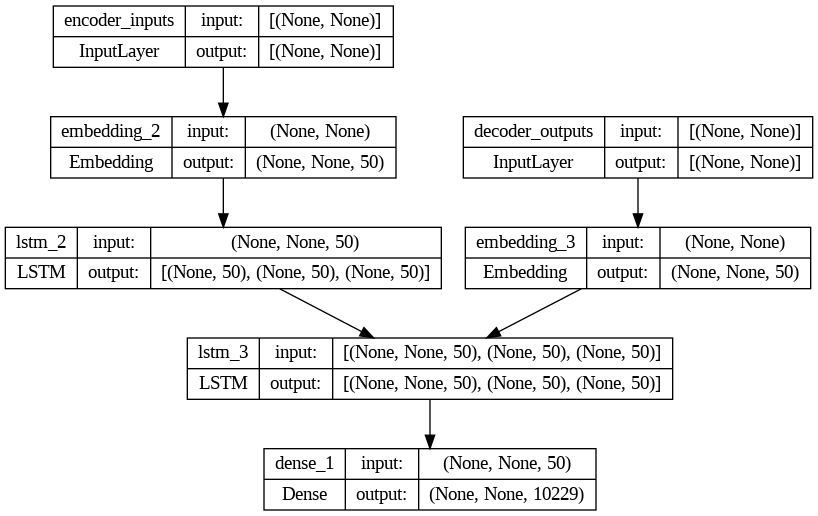

In [78]:
from keras.utils import plot_model
plot_model(model,to_file='trained_model.png',show_shapes=True)

In [79]:
train_samples=len(X_train)
val_samples=len(X_test)
batch_size=128
epochs=50

In [80]:
model.fit_generator(generator=generator_batch(X_train,y_train,batch_size=batch_size),steps_per_epoch=train_samples//batch_size,epochs=epochs)

<ipython-input-80-b6d49cc396bb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=generator_batch(X_train,y_train,batch_size=batch_size),steps_per_epoch=train_samples//batch_size,epochs=epochs)


Epoch 1/50
272/272 [==============================] - 207s 682ms/step - loss: 5.7831 - accuracy: 0.1581
Epoch 2/50
272/272 [==============================] - 185s 681ms/step - loss: 4.9290 - accuracy: 0.1597
Epoch 3/50
272/272 [==============================] - 200s 736ms/step - loss: 4.6961 - accuracy: 0.1789
Epoch 4/50
272/272 [==============================] - 190s 697ms/step - loss: 4.5548 - accuracy: 0.1907
Epoch 5/50
272/272 [==============================] - 187s 684ms/step - loss: 4.4343 - accuracy: 0.1991
Epoch 6/50
272/272 [==============================] - 197s 725ms/step - loss: 4.3399 - accuracy: 0.2100
Epoch 7/50
272/272 [==============================] - 186s 682ms/step - loss: 4.2696 - accuracy: 0.2160
Epoch 8/50
272/272 [==============================] - 186s 684ms/step - loss: 4.2140 - accuracy: 0.2205
Epoch 9/50
272/272 [==============================] - 198s 727ms/step - loss: 4.1669 - accuracy: 0.2234
Epoch 10/50
272/272 [==============================] - 188s 693m

In [81]:
model_json=model.to_json()
with open('model_2.json','w') as json_file:
  json_file.write(model_json)
model.save_weights('model_weight_5.h5')
print('Saved Model to Disc')

Saved Model to Disc


In [87]:
from keras.models import model_from_json
json_file=open('model_2.json','r')
loaded_model_json=json_file.read()
json_file.close()
model_loaded = model_from_json(loaded_model_json)
model_loaded.load_weights('model_weight_5.h5')

In [93]:
latent_dim=50
encoder_inputs_inf=model_loaded.input[0]
encoder_outputs_inf,inf_state_h,inf_state_c=model_loaded.layers[4].output
encoder_inf_states=[inf_state_h,inf_state_c]
encoder_model=Model(encoder_inputs_inf,encoder_inf_states)

In [94]:
decoder_state_h_input=Input(shape=(latent_dim,))
decoder_state_c_input=Input(shape=(latent_dim,))
decoder_state_input=[decoder_state_h_input,decoder_state_c_input]

decoder_input_inf=model_loaded.input[1]
decoder_emb_inf=model_loaded.layers[3](decoder_input_inf)
decoder_lstm_inf=model_loaded.layers[5]
decoder_output_inf,decoder_state_h_inf,decoder_state_c_inf=decoder_lstm_inf(decoder_emb_inf,initial_state=decoder_state_input)
decoder_state_inf=[decoder_state_h_inf,decoder_state_c_inf]
dense_inf=model_loaded.layers[6]
decoder_output_final=dense_inf(decoder_output_inf)
decoder_model=Model([decoder_input_inf]+decoder_state_input,[decoder_output_final]+decoder_state_inf)

In [96]:
with open('tokenizer_input.pkl','rb') as f:
  tokenizer_input=pkl.load(f)
with open('tokenizer_target.pkl','rb') as f:
  tokenizer_target=pkl.load(f)
reverse_word_map_input=dict(map(reversed,tokenizer_input.word_index.items()))
reverse_word_map_target=dict(map(reversed,tokenizer_target.word_index.items()))

In [106]:
def decode_seq(input_seq):
  state_values_encoder=encoder_model.predict(input_seq)
  target_seq=np.zeros((1,1))
  target_seq[0,0]=tokenizer_target.word_index['start']
  stop_condition=False
  decoder_sentance=''
  while not stop_condition:
    sample_word,decoder_h,decoder_c=decoder_model.predict([target_seq]+state_values_encoder)
    sample_word_index=np.argmax(sample_word[0,-1,:])
    decoder_word=reverse_word_map_target[sample_word_index]
    decoder_sentance += ' '+decoder_word
    if(decoder_word=='end' or len(decoder_sentance)>70):
      stop_condition=True
    target_seq[0,0]=sample_word_index
    state_values_encoder=[decoder_h,decoder_c]
  return decoder_sentance

In [107]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
for i in range(10):
  sentance=X_test[i]
  original_target=y_test[i]
  input_seq=tokenizer_input.texts_to_sequences([sentance])
  pad_sequence=pad_sequences(input_seq,maxlen=30,padding='post')
  predicted_target=decode_seq(pad_sequence)
  print('Test Sentance: ',i+1)
  print('Sentance: ',sentance)
  print('Original Translate: ',original_target[6:-4])
  print('Predicted Translate: ',predicted_target[:-4])
  print('_'*30)

1/1 [==============================] - 0s 27ms/step
Test Sentance:  1
Sentance:  he s a big coward
Original Translate:  तो एकदमच भित्रा आहे
Predicted Translate:   तो एक भरपूर आहेत
______________________________
1/1 [==============================] - 0s 31ms/step
Test Sentance:  2
Sentance:  where are the rest of the files
Original Translate:  बाकीच्या फायली कुठे आहेत
Predicted Translate:   आता किती बहीण
______________________________
1/1 [==============================] - 0s 28ms/step
Test Sentance:  3
Sentance:  he kicked the ball
Original Translate:  त्याने चेंडूला लात मारली
Predicted Translate:   त्यांनी त्याला एक घेतलं
______________________________
1/1 [==============================] - 0s 29ms/step
Test Sentance:  4
Sentance:  tom loves to argue with people
Original Translate:  टॉमला लोकांशी भांडायला खूप आवडतं
Predicted Translate:   टॉमला पैसे ती खूप आवडतो
______________________________
1/1 [==============================] - 0s 40ms/step
Test Sentance:  5
Sentance:  now i get it
